## Horses vs Humans

Van a crear un notebook de kaggle para probar su clasificador neuronal binario a partir del dataset (https://www.kaggle.com/sanikamal/horses-or-humans-dataset) 

Indicaciones:

- Considere una arquitectura neuronal simple primero.
- Deben utilizar Image Augmentation (ImageDataGenerator de Keras).
- Considere utilizar BatchNormalization y Dropout
- Los optimizadores de moda son SGD, Adam, Adamax, RMSprop
- Considere modificar el learning rate comno hyperparametro del optimizador
- Debe probar el clasificadfor con imagenes de personas reales y caballos reales.
- https://www.kindpng.com/picc/m/154-1542577_full-body-guy-in-suit-png-transparent-png.png
- https://www.winnerscircle-equine.com/storage/app/media/3j.jpg

Debe entregar en un txt la ruta de su cuaderno de Kaggle. Recuerde probar primero que su ruta es accesible en otro browser.

Su clasificador es binario, considere utilizar softmax o sigmoid para comparar su utilidad.

In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# fix 'DirectoryIterator' object has no attribute 'shape'
from tensorflow.python.keras.utils.data_utils import Sequence

import warnings
warnings.filterwarnings('ignore')

In [3]:
ENTRENAMIENTO_DIR = "C:/Users/XPC/Desktop/horse-or-human/train"
PRUEBAS_DIR = "C:/Users/XPC/Desktop/horse-or-human/validation"

# configuracion de entrenamiento
entrenamiento_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    fill_mode='nearest')

# generador
generador_entrenamiento = entrenamiento_datagen.flow_from_directory(
    ENTRENAMIENTO_DIR,
    target_size=(128,128),
    class_mode='categorical'
)

# configuacion de pruebas (test set)
pruebas_datagen = ImageDataGenerator(rescale=1./255)

# generador
generator_pruebas = pruebas_datagen.flow_from_directory(
        PRUEBAS_DIR,
        target_size=(128, 128),
        class_mode='categorical')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [5]:
modelo = keras.Sequential(
    [
        keras.Input(shape=(128, 128, 3)),
        # =============================
        # ...CAPAS CONVOLUCIONALES...
        # =============================
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(.2),
        layers.BatchNormalization(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(.2),
        layers.Dense(16, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(2, activation="sigmoid"),
    ]
)

# paciencia: cantidad de epochs para ver si mejora la cosa.
early_stop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)

modelo.build((128, 128))
modelo.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
modelo.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49152)             196608    
_________________________________________________________________
dense (Dense)                (None, 512)               25166336  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
____

In [6]:
history = modelo.fit(
    generador_entrenamiento,
    batch_size = 200,
    shuffle=True,
    epochs = 50, 
    verbose = 1,
    validation_data=generator_pruebas,
    validation_steps=200)

Epoch 1/50
33/33 [==============================] - 16s 481ms/step - loss: 0.5288 - acc: 0.7395 - val_loss: 10.4195 - val_acc: 0.5000
Epoch 2/50
33/33 [==============================] - 14s 410ms/step - loss: 0.4221 - acc: 0.8028 - val_loss: 1.0727 - val_acc: 0.6758
Epoch 3/50
33/33 [==============================] - 14s 409ms/step - loss: 0.3446 - acc: 0.8315 - val_loss: 0.8997 - val_acc: 0.7402
Epoch 4/50
33/33 [==============================] - 14s 411ms/step - loss: 0.2981 - acc: 0.8685 - val_loss: 2.6517 - val_acc: 0.5898
Epoch 5/50
33/33 [==============================] - 13s 409ms/step - loss: 0.2883 - acc: 0.8763 - val_loss: 0.6657 - val_acc: 0.8086
Epoch 6/50
33/33 [==============================] - 14s 413ms/step - loss: 0.2354 - acc: 0.9056 - val_loss: 0.2855 - val_acc: 0.8926
Epoch 7/50
33/33 [==============================] - 14s 412ms/step - loss: 0.2418 - acc: 0.9002 - val_loss: 0.9537 - val_acc: 0.8203
Epoch 8/50
33/33 [==============================] - 14s 414ms/step -

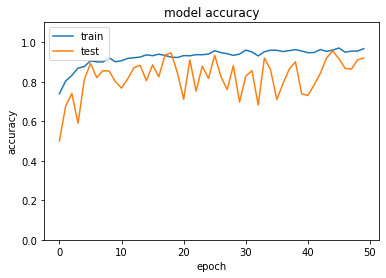

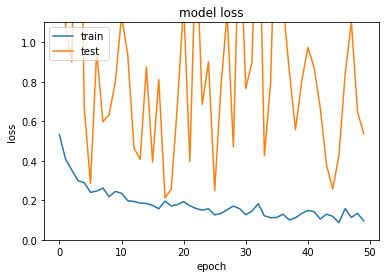

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

In [8]:
score = modelo.evaluate_generator (generator_pruebas,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5367698990739882
Test accuracy: 0.9199219
